___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Gabriel Duarte

#### Beni Stern

#### Henrique Thome

#### Christiano Borges

___

# Valor de Jogadores de Futebol

___

## A. INTRODUÇÃO

O futebol moderno nasceu em meados do século XIX e desde então não para de ganhar importância. Com o tempo, devido aos adventos do capitalismo esse esporte se tornou um grande mercado internacional com valores de transferências batendo a casa do bilhão de real, com enfoque nos últimos 5 anos, no qual as cifras aumentaram drasticamente.
Devido a esse forte aumento nos valores da transferência surgem teorias e desconfianças de que alguns jogadores tem seus valores aumentados como uma forma de lavar dinheiro.
Dessa forma esse projeto tem o objetivo de modelar a precificação  dos atletas para servir tanto como uma ferramenta para os dirigentes consultarem o preço de mercado dos atletas quanto para órgãos governamentais consultarem suspeitas de lavagem de dinheiro

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [345]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, probplot
from scipy import stats
import statsmodels.api as sm

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

### BASE DE DADOS

In [346]:
dados = pd.read_csv("data.csv")
dados.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [347]:
def Filtro(dados,coluna):
    lista = []
    for e in dados[coluna]:
        str_e = str(e)
        novo = str_e.replace("€","").replace("M","").replace("K","").replace("lbs","").replace("'",".").replace("+3","").replace("+2","").replace("+5","").replace("+4","")
        lista.append(float(novo))
    
    return lista

In [348]:
Variaveis = ["Release Clause",'ID','Age','Overall','Potential','Value','Wage','Special','International Reputation','Weak Foot','Skill Moves','Jersey Number','Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']
for e in Variaveis:
    dados[e] = pd.DataFrame(Filtro(dados,e))
dados = dados[Variaveis].dropna()
dados.head()

,Release Clause,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,226.5,158023.0,31.0,94.0,94.0,110.5,565.0,2202.0,5.0,4.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,127.1,20801.0,33.0,94.0,94.0,77.0,405.0,2228.0,5.0,4.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,228.1,190871.0,26.0,92.0,93.0,118.5,290.0,2143.0,5.0,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,196.4,192985.0,27.0,91.0,92.0,102.0,355.0,2281.0,4.0,5.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,172.1,183277.0,27.0,91.0,91.0,93.0,340.0,2142.0,4.0,4.0,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


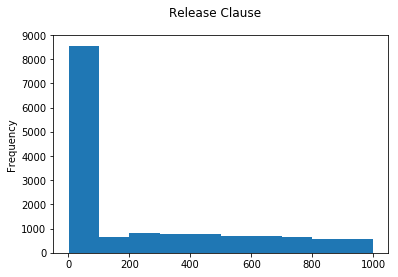

In [349]:
dados['Release Clause'].plot.hist()
plt.suptitle("Release Clause");

In [350]:
dados_escolhidos = dados[['Release Clause','Overall','International Reputation','Potential']]
dados_escolhidos.head()

,Release Clause,Overall,International Reputation,Potential
0,226.5,94.0,5.0,94.0
1,127.1,94.0,5.0,94.0
2,228.1,92.0,5.0,93.0
4,196.4,91.0,4.0,92.0
5,172.1,91.0,4.0,91.0


In [351]:
pd.DataFrame(dados_escolhidos.corr()['Release Clause'])

,Release Clause
Release Clause,1.000000
Overall,-0.417279
International Reputation,-0.167733
Potential,-0.405872


In [352]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

y = dados['Release Clause']
x = dados[['Overall','International Reputation','Potential']]

results = regress(x,y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Release Clause   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     1300.
Date:                Wed, 29 May 2019   Prob (F-statistic):               0.00
Time:                        01:45:44   Log-Likelihood:            -1.0336e+05
No. Observations:               14743   AIC:                         2.067e+05
Df Residuals:                   14739   BIC:                         2.068e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1874.3301     27.388     68.437      0.000    1820.647    1928.013
Overall                    -13.0861      0.455    -28.732      0.000     -13.979     -12.193
International Reputation    56.1972      6.412      8.765      0.000      43.629      68.765
Potential                  -11.8245      0.480    -24.635      0.000     -12.765     -10.884
==============================================================================
Omnibus:                     1979.524   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2876.198
Skew:                           1.068   Prob(JB):                         0.00
Kurtosis:                       3.344   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ANÁLISE DESCRITIVA

Ajuste linear entre Overall e Release Clause:
Coeficiente linear: 1437.7446815689852
Coeficiente angular: -18.27021442469353


,Overall,Release Clause
Overall,1.000000,-0.417279
Release Clause,-0.417279,1.000000


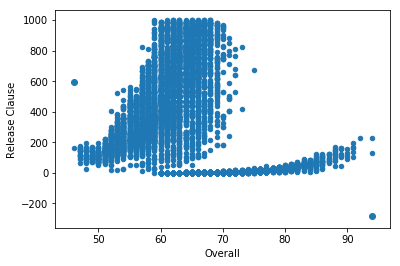

In [353]:
#overall x release clause

cov2 = dados['Overall'].cov(dados['Release Clause'])

var_X2 = dados['Overall'].var()
var_Y2 = dados['Release Clause'].var()

mX2 = dados['Overall'].mean()
mY2 = dados['Release Clause'].mean()

a2 = cov2 / var_X2
b2 = mY2 - a2*mX2

print('Ajuste linear entre Overall e Release Clause:')
print('Coeficiente linear:', b2)
print('Coeficiente angular:', a2)

dados.plot.scatter(x='Overall', y='Release Clause')

plt.scatter((dados['Overall'].min(), dados['Overall'].max()), 
         (a2*dados['Overall'].min() + b2, a2*dados['Overall'].max() + b2))

plt.xlabel('Overall')
plt.ylabel('Release Clause');

dados.loc[:, ['Overall', 'Release Clause']].corr()

Ajuste linear entre Release Clause e Potential:
Coeficiente linear: 1656.9721903346824
Coeficiente angular: -20.07485770721811


,Release Clause,Potential
Release Clause,1.000000,-0.405872
Potential,-0.405872,1.000000


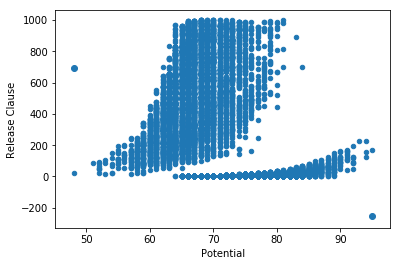

In [354]:
#Release Clause e Overall


cov = dados["Potential"].cov(dados['Release Clause'])

var_X = dados["Potential"].var()
var_Y = dados['Release Clause'].var()

mX = dados["Potential"].mean()
mY = dados['Release Clause'].mean()

a = cov / var_X
b = mY - a*mX

print('Ajuste linear entre Release Clause e Potential:')
print('Coeficiente linear:', b)
print('Coeficiente angular:', a)

dados.plot.scatter(x="Potential", y="Release Clause")

plt.scatter((dados["Potential"].min(), dados["Potential"].max()), 
         (a*dados["Potential"].min() + b, a*dados["Potential"].max() + b))

plt.xlabel("Potential")
plt.ylabel('Release Clause')

dados.loc[:, ['Release Clause', "Potential"]].corr()

  Na análise descritiva, decidimos observar as duas variáveis que tem mais influencia no preço (Release Clause): Potêncial e overall. Overall é uma média que leva em consideração diversos aspectos do atleta, incluindo os aspectos técnicos, táticos e físicos. Ambos os gráficos (Release Clause vs Potencial e Release Clause vs Overall) se comportaram como o esperado, até um ponto: o crescimento do gráfico foi exponencial. 
Para os valores mais altos, no entanto, os gráficos se comportaram de maneira mais linear, no qual um aumento no eixo x, não refletiu em um aumento no preço do jogador. No primeiro momento achamos que havia algum erro, porém ao analisarmos a situação melhor e pesquisarmos um pouco mais sobre o mercado futebolistico chegamos à uma conclusão: A maioria dos times não tem um alto poder financeiro, dessa forma não conseguem pagar os salários que os atletas tops desejam. Assim, para conseguir manter ou contratar esses jogadores, os clubes diminuem o valor da multa, o que dá vantagem ao atleta, uma vez que esse tem mais liberdade para decidir seu futuro.     

___
## C. MODELOS DE PREDIÇÃO


Para que possamos treinar nossos modelos de predição e testalos, foi utilizado a função *train_test_split* para dividir a base de dados em partes de treinamento e teste

In [355]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

In [356]:
def modelo_0(Y):
    y_pred=[]
    for i in range(len(Y)):
        y_pred.append(np.mean(Y))
    return y_pred
y_pred0 = modelo_0(y_test)
print('média =',y_pred0[0])

média = 226.62057427085668


o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

In [357]:
erros = []
for i in range(1,20):
    clf=KNeighborsRegressor(i)
    clf.fit(X_train,y_train)
    y_pred1 = clf.predict(X_train)
    erro = (mean_squared_error(y_train,y_pred1))
    erros.append(erro)

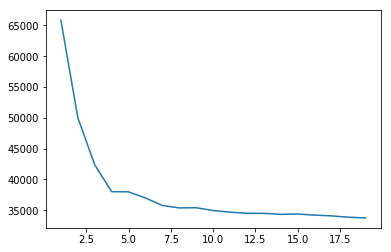

In [358]:
plt.plot(range(1,20),erros)

In [359]:
def modelo_1(X,Y):
    k = 10
    clf=KNeighborsRegressor(k)
    clf.fit(X,Y)
    y_pred = clf.predict(X)
    return y_pred

y_pred1 = modelo_1(X_train,y_train)

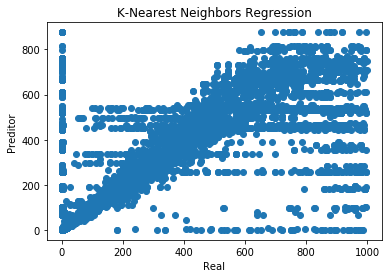

In [360]:
plt.scatter(y_train,y_pred1);
plt.title('K-Nearest Neighbors Regression')
plt.ylabel('Preditor')
plt.xlabel('Real')
plt.show()

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

In [361]:
def modelo_2(X,Y):
    model = LinearRegression()
    model.fit(X, Y)
    y_pred = model.predict(X)
    return y_pred
    
y_pred2 = modelo_2(X_train,y_train)

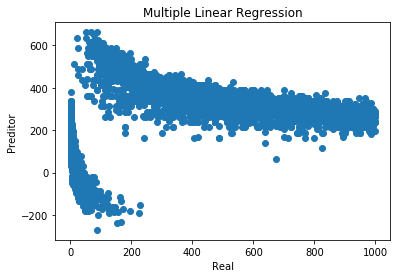

In [362]:
plt.scatter(y_train,y_pred2)
plt.title('Multiple Linear Regression')
plt.ylabel('Preditor')
plt.xlabel('Real')
plt.show()

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

In [363]:
def modelo_3(X,Y):
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X,Y)
    y_pred = regressor.predict(X)
    return y_pred

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,y_train)
y_pred3 = modelo_3(X_train,y_train)

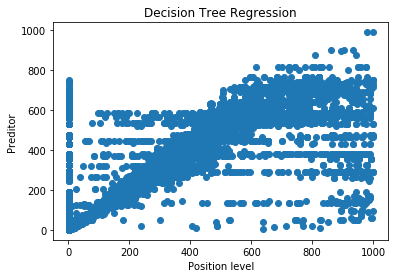

In [364]:
plt.scatter(y_train, y_pred3)
plt.title('Decision Tree Regression')
plt.xlabel('Position level')
plt.ylabel('Preditor')
plt.show()

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

In [365]:
pred_teste = [modelo_0(y_test),modelo_1(X_test,y_test),modelo_2(X_test,y_test),modelo_3(X_test,y_test)]

def validacao(preds,teste):
    R2 = []
    RMS = []
    for p in preds:
        R2.append(r2_score(teste,p))
        RMS.append(mean_squared_error(teste,p))
    return R2, RMS
#print('Média R2  =',np.mean(validacao(pred_teste,y_test)[0]))
#print('Média RMS =',np.mean(validacao(pred_teste,y_test)[1]))

In [366]:
info = pd.DataFrame(data = {'R2':R2,'RMS':RMS})
info.index= ['MODELO DE PREDIÇÃO PELA MÉDIA','MODELO DOS K VIZINHOS MAIS PRÓXIMOS','MODELO DE REGRESSÃO LINEAR ','MODELO DE ÁRVORES DE REGRESSÃO']

In [367]:
info

,R2,RMS
MODELO DE PREDIÇÃO PELA MÉDIA,0.000000,91131.741670
MODELO DOS K VIZINHOS MAIS PRÓXIMOS,0.596338,36786.398066
MODELO DE REGRESSÃO LINEAR,0.210377,71959.674839
MODELO DE ÁRVORES DE REGRESSÃO,0.639287,32872.414353


A partir do estudo sobre o preço médio dos jogadores, quando calculado a validação dos nossos modelos de predição com a parte de teste da base de dados,  foi observado que a raíz do erro médio quadrático(RMS) foi relativamente alta, indicando uma baixa qualidade dos modelos, por volta dos 35000, Já o coeficiente de determinação(R2) em seu melhor modelo foi próximo 0.64, mostrando que com as variáveis escolhidas conseguimos explicar o preço dos jogadores em quase 64% das vezes.

___
## E. CONCLUSÃO

Nosso software atingiu uma acurácia de 63,9% usando a árvore de regressão, que foi a ferramenta que nos deu o maior nível de precisão. A partir disso, podemos concluir que nosso sistema não tem a capacidade para ser usado como um programa para previnir fraudes no futebol por sí só, porém esse pode ser utilizado como uma ferramenta primária para alertar, sendo necessária uma análise posterior mais detalhada e individualizada.Acreditamos que o motivo que nos impediu de atingir uma acurácia maior foi o fato de que uma negociação envolve outros aspectos que não podem ser mensuráveis através de variáveis, uma vez que uma transferência se trata de uma negociação entre dois ou mais seres passionais.                              

O valor de um jogador pode ter influencias importantes, como por exemplo: o momento político que o clube está vivendo/ o presidente, do momento do jogador, seu carisma e da procura que esse jogador está tendo e a carência do time naquela posição.

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS

https://medium.com/data-py-blog/decision-tree-regression-in-python-b185a3c63f2b

https://educationalresearchtechniques.com/2018/11/02/k-nearest-neighbor-regression-with-python/

https://towardsdatascience.com/random-forests-and-decision-trees-from-scratch-in-python-3e4fa5ae4249

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/

https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/